In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import particle

In [21]:
particles_pythia = pd.read_csv("../output/event000000000-particles.csv")
particles_pythia["vr"] = np.hypot(particles_pythia.vx, particles_pythia.vy)
particles_pythia["p"] = np.hypot(np.hypot(particles_pythia.px, particles_pythia.py), particles_pythia.pz)
particles_pythia["E"] = np.sqrt(particles_pythia.m**2 + particles_pythia.p**2)
particles_pythia["type_name"] = [ particle.Particle.from_pdgid(p).name for p in particles_pythia.particle_type ]
particles_pythia.head(3)

,particle_id,particle_type,process,vx,vy,vz,vt,px,py,pz,m,q,vr,p,E,type_name
0,4503599677702144,-321,0,-0.006878,0.006443,26.299278,6.842251,-0.736909,0.888733,0.438275,0.49368,-1,0.009424,1.234895,1.329919,K-
1,4503599694479360,-211,0,-0.006878,0.006443,26.299278,6.842251,0.181590,-0.909379,-209.134827,0.13957,-1,0.009424,209.136883,209.136930,pi-
2,4503599711256576,211,0,-0.006878,0.006443,26.299278,6.842251,0.551323,0.428394,-121.076332,0.13957,1,0.009424,121.078345,121.078426,pi+


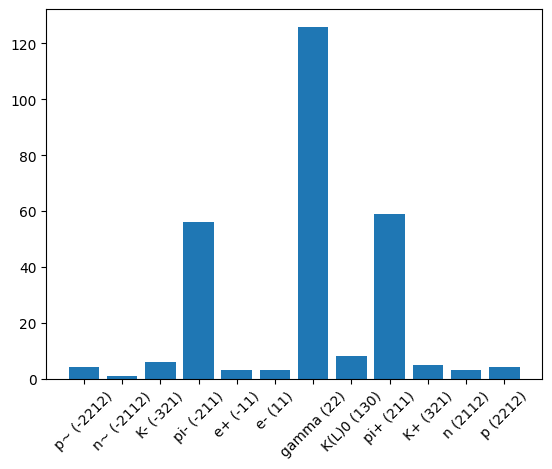

In [15]:
ptypes, counts = np.unique(particles_pythia.particle_type, return_counts=True)
plt.bar(np.arange(len(ptypes)), counts)
_ = plt.xticks(np.arange(len(ptypes)), [ "{} ({})".format(particle.Particle.from_pdgid(p).name, p) for p in ptypes ], rotation=45)

In [28]:
particles_pythia.sort_values("p", ascending=False).head()

,particle_id,particle_type,process,vx,vy,vz,vt,px,py,pz,m,q,vr,p,E,type_name
82,4503601170874368,211,0,-0.006878,0.006443,26.299278,6.842251,0.249248,0.425442,1142.603390,0.13957,1,0.009424,1142.603496,1142.603505,pi+
107,4503602060066816,-211,0,-0.006878,0.006443,26.299278,6.842251,0.292494,0.111642,-1056.760010,0.13957,-1,0.009424,1056.760056,1056.760066,pi-
200,4559678059053056,22,0,-0.006953,0.006541,25.978624,6.843320,-0.279839,0.301856,-972.345032,0.00000,0,0.009547,972.345119,972.345119,gamma
91,4503601321869312,2212,0,-0.006878,0.006443,26.299278,6.842251,-0.273401,0.254182,852.838501,0.93827,1,0.009424,852.838583,852.839099,p
84,4503601204428800,211,0,-0.006878,0.006443,26.299278,6.842251,-0.033929,-0.335862,-759.797424,0.13957,1,0.009424,759.797499,759.797512,pi+


In [27]:
particles_electron_positron = particles_pythia[ abs(particles_pythia.particle_type) == 11 ].copy()
particles_electron_positron.sort_values("p", ascending=False).head()

,particle_id,particle_type,process,vx,vy,vz,vt,px,py,pz,m,q,vr,p,E,type_name
111,4504699172552704,-11,0,-0.006878,0.006443,26.299278,6.842251,16.950470,-26.178854,-78.596878,0.000511,1,0.009424,84.558383,84.558383,e+
110,4504699155775488,11,0,-0.006878,0.006443,26.299278,6.842251,-32.222107,19.054878,-59.211590,0.000511,-1,0.009424,70.052587,70.052587,e-
225,4572872651571200,-11,0,-0.006953,0.006531,26.299061,6.842251,-0.237395,0.313127,-0.630073,0.000511,1,0.009539,0.742561,0.742561,e+
252,4588266267344896,11,0,-4.963263,5.165507,-17.119650,6.992920,0.007602,-0.027932,-0.064922,0.000511,-1,7.163549,0.071083,0.071085,e-
224,4572872634793984,11,0,-0.006953,0.006531,26.299061,6.842251,-0.014475,0.016353,-0.028821,0.000511,-1,0.009539,0.036161,0.036165,e-
